In [1]:
import pandas as pd
from matplotlib import pyplot as plt

pd.set_option("display.width", 500)
pd.set_option("display.max_colwidth", 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

%matplotlib inline

In [3]:
df = pd.read_csv("../data/processed/federal/despesas/gastos diretos/ufc_201308_201701.csv", encoding='iso-8859-1')

In [4]:
df.shape

(279853, 10)

# Análise rápida

In [8]:
df.valor.sum()

802022301.5897828

In [9]:
df.nome_favorecido.value_counts().head(10)

HARABELLO PASSAGENS, TURISMO E EVENTOS LTDA - EPP                         3063
EMPRESA BRASILEIRA DE INFRA-ESTRUTURA AEROPORTUARIA [INFRAERO]            3011
COMPANHIA ENERGETICA DO CEARA [COELCE]                                    2892
CRIART SERVICOS DE TERCEIRIZACAO DE MAO DE OBRA LTDA [CRIART SERVICOS]    2501
SERVAL SERVICOS E LIMPEZA LTDA. [SERVAL]                                  1984
VL HORIZONTE TRANSPORTES LTDA - ME [V L HORIZONTE TRANSPORTE]             1304
TAM LINHAS AEREAS S/A.                                                    1081
SERVIARM SERVICO DE VIGILANCIA ARMADA LTDA                                1077
MAGNA HOTEIS E TURISMO LTDA [MAREIRO HOTEL]                                963
VRG LINHAS AEREAS S.A.                                                     921
Name: nome_favorecido, dtype: int64

In [10]:
df.groupby(df.nome_favorecido).valor.sum().nlargest(10)

nome_favorecido
BANCO DO BRASIL SA [DIRECAO GERAL]                                       56612656.11
CRIART SERVICOS DE TERCEIRIZACAO DE MAO DE OBRA LTDA [CRIART SERVICOS]   55618364.40
COMPANHIA ENERGETICA DO CEARA [COELCE]                                   42699272.21
FUNDACAO CEARENSE DE PESQUISA E CULTURA [FCPC]                           42393164.71
SERVIARM SERVICO DE VIGILANCIA ARMADA LTDA                               40037164.86
BANCO SANTANDER (BRASIL) S.A.                                            37705102.13
I S M GOMES DE MATTOS                                                    24280567.62
SERVAL SERVICOS E LIMPEZA LTDA. [SERVAL]                                 21985345.95
ISM GOMES DE MATTOS EIRELI                                               15876139.94
CONSTRUTORA PORTO LTDA - EPP [CONSTRUTORA PORTO]                         15602054.19
Name: valor, dtype: float64

In [11]:
df.groupby(df.elemento_despesa).valor.sum().nlargest(10)

elemento_despesa
Outros Serviços de Terceiros - Pessoa Jurídica   218605338.65
Locação de Mão-de-Obra                           152509511.03
Obras e Instalações                              120216682.79
Auxílio Financeiro a Estudantes                   70533690.86
Auxílio-Alimentação                               65873464.03
Equipamentos e Material Permanente                58142511.28
Indenizações e Restituições                       32818171.91
Material de Consumo                               21504136.97
Outros Serviços de Terceiros - Pessoa Física      21315513.85
Passagens e Despesas com Locomoção                 9960032.81
Name: valor, dtype: float64

In [12]:
df.groupby(df.elemento_despesa).apply(lambda x: x.valor.max())

elemento_despesa
Auxílio Financeiro a Estudantes                                          6018.00
Auxílio Financeiro a Pesquisadores                                      27500.00
Auxílio-Alimentação                                                   2196407.56
Auxílio-Transporte                                                      57899.84
Contratação por Tempo Determinado                                       70511.14
Despesas de Exercícios Anteriores                                      177542.41
Equipamentos e Material Permanente                                    1795911.25
Indenizações e Restituições                                            786586.59
Locação de Mão-de-Obra                                                 774392.20
Material de Consumo                                                    495259.00
Obras e Instalações                                                   2197426.26
Obrigações Tributárias e Contributivas                                  98049.39
Outros Auxí

In [13]:
df[df.elemento_despesa.isin(['Auxílio Financeiro a Pesquisadores'])]\
.groupby('nome_favorecido').valor.sum().nlargest(10)

nome_favorecido
FRANCISCO GLEIDSON DA COSTA GASTAO              105000.00
JOSE RAIMUNDO DE ARAUJO CARVALHO JUNIOR          90000.00
FRANCISCO HIRAN FARIAS COSTA                     88000.00
LUIS PARENTE MAIA                                88000.00
MARCELO DE OLIVEIRA SOARES                       88000.00
RAIMUNDO MARIANO GOMES CASTELO BRANCO            88000.00
MONICA PIMENTA DE NOVAES CASTELO BRANCO          70000.00
HOSIBERTO BATISTA DE SANTANA                     65300.00
VALDERI DIAS FERREIRA FILHO                      60000.00
RACHEL GRADVOHL DE MACEDO                        57600.00
Name: valor, dtype: float64

In [14]:
df[df.elemento_despesa.isin(['Auxílio Financeiro a Estudantes'])]\
.groupby('nome_favorecido').valor.sum().nlargest(10)

nome_favorecido
ALAN CASTRO ALBUQUERQUE                         30072.11
FRANCISCO DE ASSIS ALENCAR PEREIRA FILHO        29039.90
EDNILTON JAIR MENDES PEREIRA                    26510.00
FRANCISCO LEONARDO BEZERRA MARTINS              26295.68
ISAC DO NASCIMENTO LIRA                         25495.57
TERSANDRO AURELIO LEAL DE SOUZA                 25251.68
TERLIANE GABRIEL DANTAS                         25245.74
TURE BABA CASSAMA                               25060.00
FRANCISCO GLEISON ALBUQUERQUE RIBEIRO           24601.68
JOBSON VIANA DE OLIVEIRA                        23915.90
Name: valor, dtype: float64

In [15]:
rs = df[df.elemento_despesa.isin(['Auxílio Financeiro a Estudantes', 'Auxílio Financeiro a Pesquisadores'])]\
.groupby([df.nome_favorecido, df.elemento_despesa]).valor.sum().unstack()

In [16]:
rs[rs['Auxílio Financeiro a Estudantes'].notnull() & rs['Auxílio Financeiro a Pesquisadores'].notnull()]

elemento_despesa,Auxílio Financeiro a Estudantes,Auxílio Financeiro a Pesquisadores
nome_favorecido,,
ASSIS FILIPE MEDEIROS ALBUQUERQUE,1720.00,1000.00
BEATRIZ SOARES DE ALMEIDA,675.00,2000.00
DIEGO DE MARIA ANDRE,6600.00,2200.00
ELOI DOS SANTOS MAGALHAES,800.00,800.00
FERNANDO BEZERRA LOPES,1170.00,3000.00
FLAVIO VASCONCELOS DE SOUZA,12036.00,54162.00
HOSIBERTO BATISTA DE SANTANA,5600.00,65300.00
JADER GARCIA JUCA,3000.00,1500.00
JAVIER MARTIN SALCEDO,600.00,13800.00


In [22]:
df[df.elemento_despesa == 'Auxílio Financeiro a Estudantes'].nome_favorecido.value_counts().nlargest(4)

ALAN CASTRO ALBUQUERQUE                          78
FRANCISCO DE ASSIS ALENCAR PEREIRA FILHO         73
FIDEL CARLOS BARROSO LUCAS                       71
JANIELE BARBOZA DANTAS                           68
Name: nome_favorecido, dtype: int64

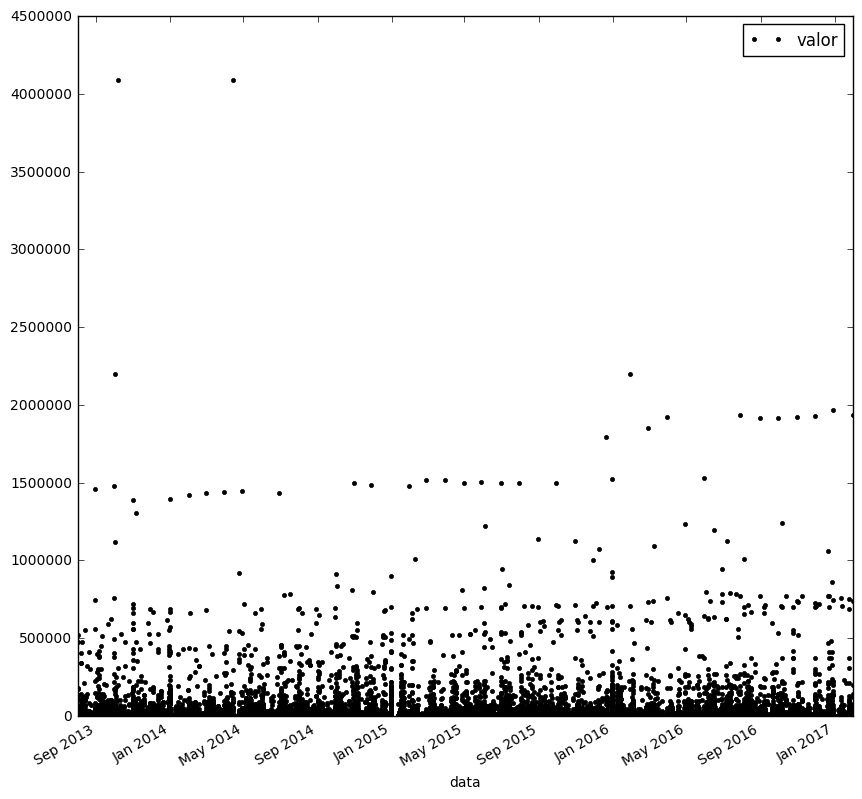

In [23]:
df.set_index('data').plot(style="k. ", figsize=(10, 10))

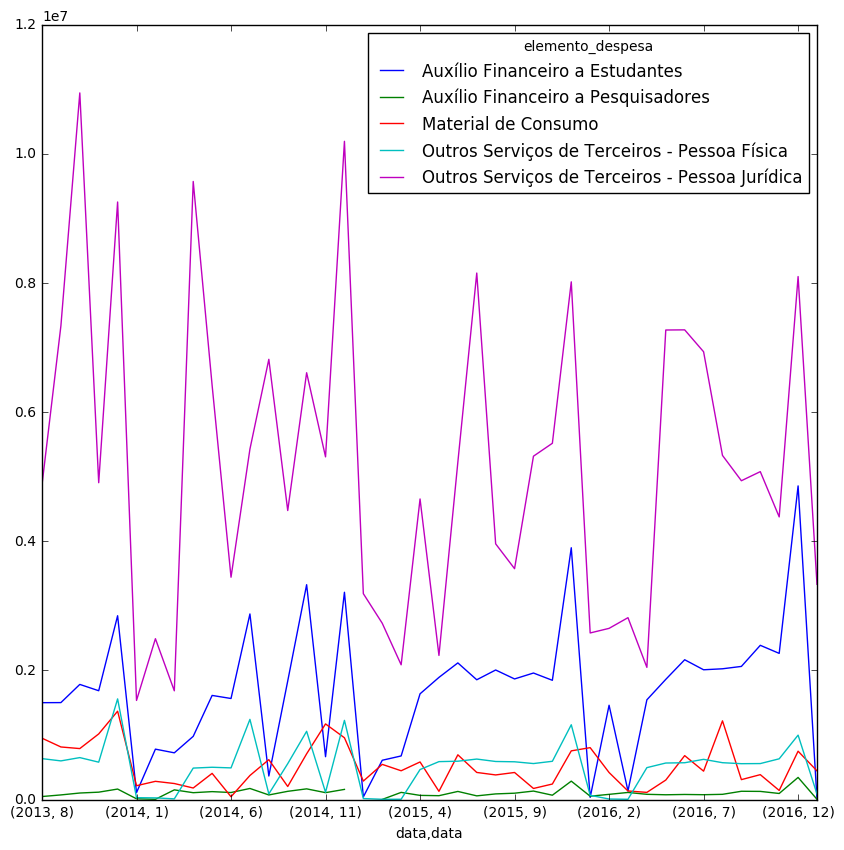

In [24]:
elementos = ['Auxílio Financeiro a Estudantes', 'Auxílio Financeiro a Pesquisadores', 'Material de Consumo',
             'Outros Serviços de Terceiros - Pessoa Física', 'Outros Serviços de Terceiros - Pessoa Jurídica']

df[df.elemento_despesa.isin(elementos)]\
.groupby([df.data.dt.year, df.data.dt.month, df.elemento_despesa]).valor.sum().unstack()\
.plot(figsize=(10, 10))

In [ ]:
ax = df[df.elemento_despesa.isin(elementos)]\
.groupby([df.data.dt.year, df.elemento_despesa]).valor.sum().unstack()\
.plot(figsize=(10, 10))

ax.set_xticks(df.data.dt.year.unique())